In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, img_as_ubyte, img_as_float
from scipy.signal import convolve2d as scipy_conv2d

# images and filtering

Image in computers are represented as arrays. A grayscale image is just a two dimensional array of size $n \times m$ of pixel intensity values (usually represented as a 8-bit unsigned int that span the range 0-255, where 0 represent black and 255 white). RGB images, instead, are represented as a 3D array, i.e three 2D matrices (one for each channel).


### Getting information about the pixel intensities
A useful and simple way to gain an overview over the pixel intensities is to compute the image histogram, i.e. the distribution of pixelvalues in the image. By observing the histogram, one is able to consider the contrast in the image.

![alt text](hist_examplehist.png "Histogram explanation")

*(Image taken from https://www.cambridgeincolour.com/tutorials/histograms1.htm --> have a look at it!*

In case of a RGB image, you can compute the histogram separateley for each channel, or transform the RGB in grayscale and get the luminance/brightness histogram.


## Exercise 1: Exploring grayscale images

The code below does the following:

- Displays the loaded image *img* using <font color='red'>plt.imshow(img,'gray')</font>
- Plots the histogram of the flattened image using *plt.hist(imgf,nbins=np.arange(<font color='red'>256</font>))*. What does the histogram tell you about the image?
- Selects one horizontal line (remember that the top-left corner is indixed as (0,0)) and display the line on the image (set one row equal to 255 on a copy of the image *img*).
- Shows the intensity variation of the pixels along that line.



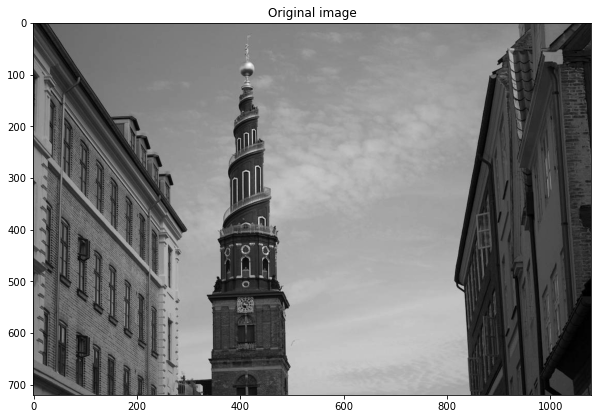

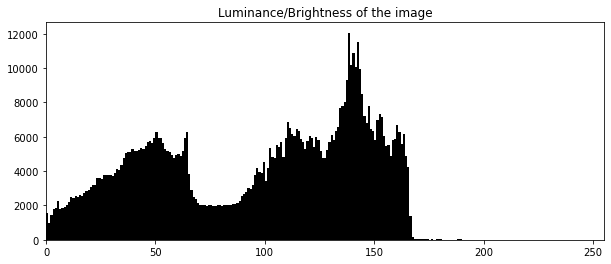

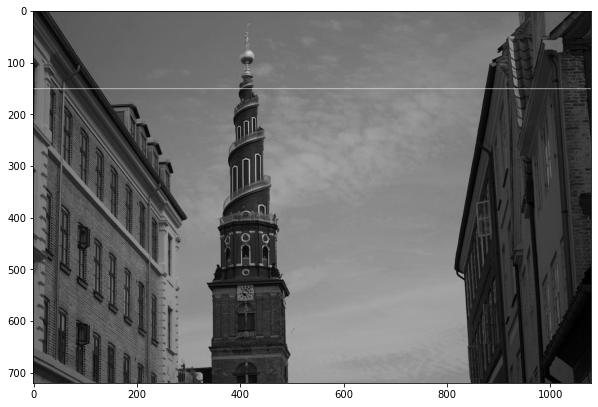

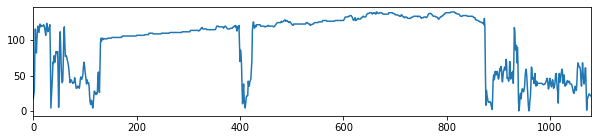

In [5]:
img = io.imread('kb_grayscale.jpg')
img_arr = np.asarray(img, dtype="int32")
imgf = img.flatten()

#plot the original greyscale image
fig = plt.figure(figsize=(10,10))
plt.imshow(img,'gray')
plt.title('Original image')
plt.show()

#plot histogram with 256 bins
fig = plt.figure(figsize=(10,4))
plt.hist(imgf, bins = np.arange(256),  color='black')
plt.title('Luminance/Brightness of the image')
plt.xlim(0, 255)
plt.show()


#display horizontal line on a copy of the image
img_arr_cpy = img_arr.copy()
line = 150
img_arr_cpy[line,:] = 255
fig = plt.figure(figsize=(10,10))
plt.imshow(img_arr_cpy,'gray')
plt.show()

#plot the intensity variation along the line
fig = plt.figure(figsize=(10,2))
plt.plot(img_arr[line,:])
plt.xlim([0,img_arr.shape[1]])
plt.show()


# Convolution (or filtering)

We are going to use images in the form of multidimensional array of data (a 2D matrix for a grayscale image and  3 2D matrices in case of a RGB image) and the kernel will be a 2D matrix (usually square with an odd number of rows/columns). Therefore, we will talk about 2D convolution.

If we have our input image $f_{in}$ and a kernel K, the convolution is defined by:

$$f_{out}(x,y)=K*f_{in}(x,y)= \sum_{s}\sum_{t}K(s,t)f_{in}(x-s,y-t)$$

where $f_{out}(x,y)$ is the value of the pixel $(x,y)$ of the output image $f_{out}$.
In this exercise we are going to consider a  **cross correlation** as a simplified technique of the convolution.

Note: Cross correlation is implemented in a lot of machine learning libraries (as Pytorch and Tensorflow) and many times they called it as **convolution**. DON'T GET CONFUSED!!! In that case you need only to flip the kernel :)

Cross correlation considers only the sum of the elementwise product between the kernel and the sub-image region considered. Formally, this is defined as:

$$f_{out}(x,y)=K\star f_{in}(x,y)= \sum_{s}\sum_{t}K(s,t)f_{in}(x+s,y+t)$$

The following GIF show how to perform the cross-correlation between an image and a kernel:

![alt text](3D_Convolution_Animation.gif "Cross correlation")




## Exercise 2: Understanding convolution

Given the descriptions go through the function *convolve_2d* and make the connection to the mathematical definition above. The function takes in a kernel and an image and then output the convolved image.



In [10]:
# First example from group discussion:
print("w:")
w       = np.array([[3,2,1]])
print(w)
print("input:")
f_in    = np.array([[0,1,0],[0,2,0],[0,3,0]])
print(f_in)
f_out   = scipy_conv2d(f_in,w,mode="valid") # note here that we use scipy's implementation since our's do zero padding.
print("valid output:")
print(f_out)
f_out   = scipy_conv2d(f_in,w,mode="same") # note here that we use scipy's implementation since our's do zero padding.
print("zero padded output:")
print(f_out)


w:
[[3 2 1]]
input:
[[0 1 0]
 [0 2 0]
 [0 3 0]]
valid output:
[[2]
 [4]
 [6]]
zero padded output:
[[3 2 1]
 [6 4 2]
 [9 6 3]]


## Exercise 3: Kernel design

You should use the 2D convolution function from the previous exercise to compute the convolution between the image you load before and some simple kernels/filters that can make the image blurry or sharp and also can be used to highlight the edges. 

- The first filter is blurry filter, in its 3x3 shape, this is given by the following matrix:

  $$ F_{blurry} = \frac{1}{9} \left[ {\begin{array}{ccc} 1&1&1\\1&1&1\\1&1&1 \end{array}} \right] $$
                                   
    where the normalization factor is computed by $\frac{1}{\sum_{i,j}F_{i,j}}$.
    
    - Why does this kernel blur the image?
    - In case the image is an high-definition image, we suggest you to create a larger filter to actually see the    blurrying effect (try 7x7 or 11x11)!

In [13]:
img_float = img_as_float(img)
# Implement the kernel for F_blurry
F_blurry = np.ones((3,3))/9

img_blur = scipy_conv2d(img_float,F_blurry)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


- The second filter you are going to apply is used to sharpen the image, this is given by:

  $$ F_{sharp} = \left[ {\begin{array}{ccc}0&-1&0\\-1&7&-1\\0&-1&0\end{array}} \right] $$ 

In [16]:
# Implement the kernel for F_sharp
F_sharp = np.array([
    [0,-1,0],
    [-1,7,-1],
    [0,-1,0]
])
print(F_sharp)
img_sharp =scipy_conv2d(img_float,F_sharp)

[[ 0 -1  0]
 [-1  7 -1]
 [ 0 -1  0]]


- The last filter is used to highlight the edges of the objects in the image. This filter is an approximation of a Laplacian filter. The Laplacian is the measure of the 2nd derivative of an image. Therefore if we have an image with pixel intensity values $f_{in}(x,y)$, the Laplacian is given by $\frac{\partial^2 I}{\partial i^2} + \frac{\partial^2 I}{\partial j^2}$.

$$ F_{edge} = \left[ {\begin{array}{ccc}0&1&0\\1&-4&1\\0&1&0\end{array}} \right] $$ 
         

In [17]:
# Implement the kernel for F_edge
F_edge  = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

img_edge = scipy_conv2d(img_float,F_edge)

- Apply each of this filter to the image and plot the filtered image. For each of this image you should also plot the intensities of the pixel along the horizontal line you choose in Exercise 1. What difference do you notice?
- What happens if you run the sharpen filter on blurry image? Try it.
- Try to filter an image multiple time. What happens to the intensity lines?

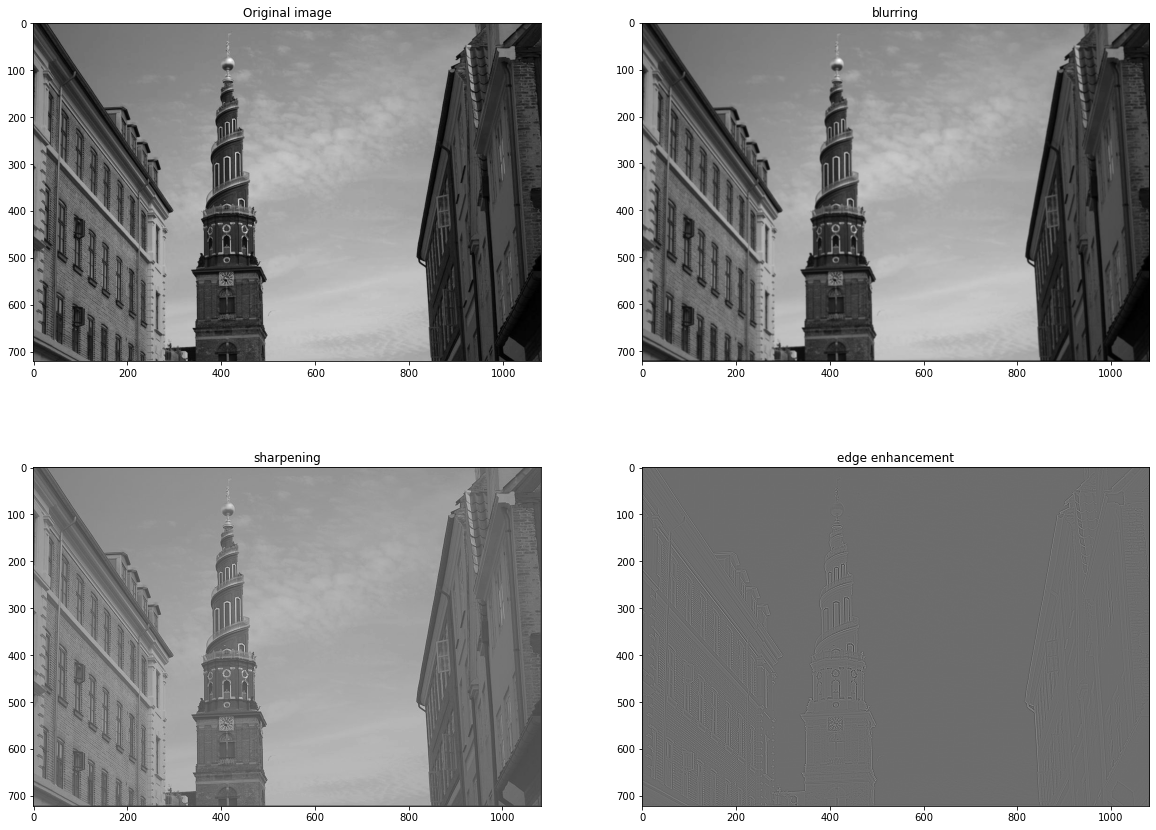

In [18]:

fig = plt.figure(figsize = (20,15))
plt.subplot(2,2, 1)
plt.imshow(img_float,'gray')
plt.title('Original image')

plt.subplot(2,2, 2)
plt.imshow(img_blur,'gray')
plt.title('blurring')


plt.subplot(2,2,3)
plt.imshow(img_sharp,'gray')
plt.title('sharpening') 

plt.subplot(2,2,4)
plt.imshow(img_edge,'gray')
plt.title('edge enhancement')

fig.savefig("filter-example.png")

## Exercise 3: Sobel filter

In this exercise you are going to apply a more sophisticated edge detection filter than the one you used in the previous exercise. We will apply a Sobel filter to the original image. The Sobel filter (also known as Sobel operator https://en.wikipedia.org/wiki/Sobel_operator) is composed by these two different filters:

$$ F_{v} = \left[ {\begin{array}{ccc}-1&0&1\\-2&0&2\\-1&0&1\end{array}} \right] $$ 
                                   
$$ F_{h} = \left[ {\begin{array}{ccc}-1&-2&-1\\0&0&0\\1&2&1\end{array}} \right] $$ 
                                  
These two filter, when convoluted with an image, are approximating the derivatives for the vertical and horizontal changes. Indeed, we have that we have that the value of the derivative is high when there is an high difference between neighbours pixels. And that is exactly where an edge is. 

If we denoted with $G_{v}$ and $G_{h}$ the resulting filtered images obtained by the convolution between $F_{v}$ and $F_{h}$ with the original image, we can use them to compute the approximation of the gradient for each point in the image by computing:

$$ G = \sqrt{ G_{v}^2 + G_{h}^2} $$


The code below does the following:
- Computes the two $G_{v}$ and $G_{h}$ filtered image and plot them. Comment on the resulting plots.
- Computes G and plot it. Compare the plot obtained by using this approach and the one using the single filter in previous the exercise.


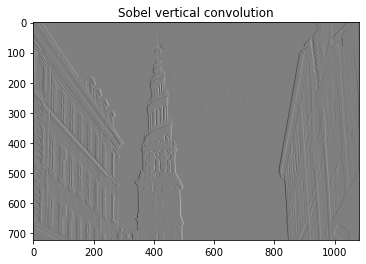

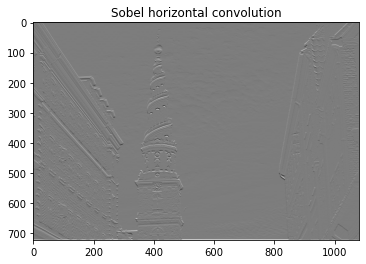

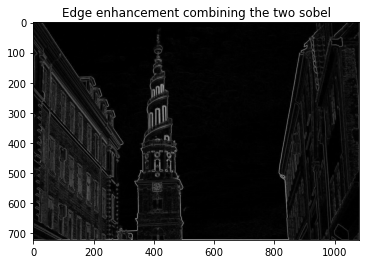

In [27]:
sobel_kernel_v = np.array([
    [2,0,-2],
    [1,0,-1],
    [1,0,-1]
])
sobel_kernel_h = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1],
])

G_v = scipy_conv2d(img_float,sobel_kernel_v)
G_h = scipy_conv2d(img_float,sobel_kernel_h)
G   = np.sqrt((G_v**2 + G_h**2))

fig = plt.figure()
plt.imshow(G_v,'gray')
plt.title('Sobel vertical convolution')
plt.show()

fig = plt.figure()
plt.imshow(G_h,'gray')
plt.title('Sobel horizontal convolution')
plt.show()

fig = plt.figure()
plt.imshow(G,'gray')
plt.title('Edge enhancement combining the two sobel')
plt.show()



## RGB images
Now we shall see, that the techniques you just used for grayscale images are also applicable to color images, but instead the convolution is done for each color dimension.

### Things to do:
- Load the *field.png* RGB image and study the provided code which displays the color channels separately
- Have a look at the *filter* variable. What do you think happens when convolving a color image with this 3D kernel?
- Study the code that convolve the image with the kernel. 
- What do you see in the resulting image?

(1080, 1920, 3)


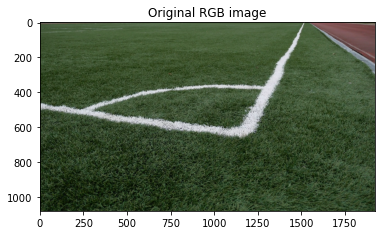

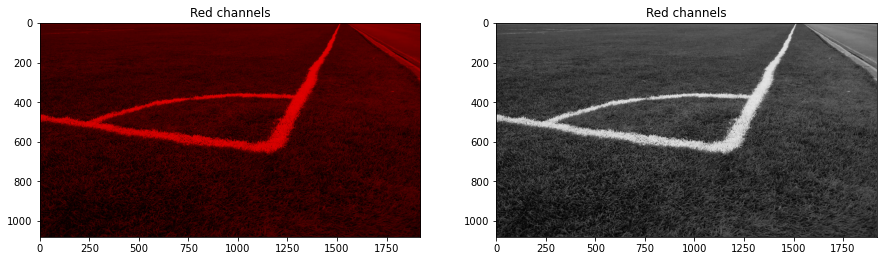

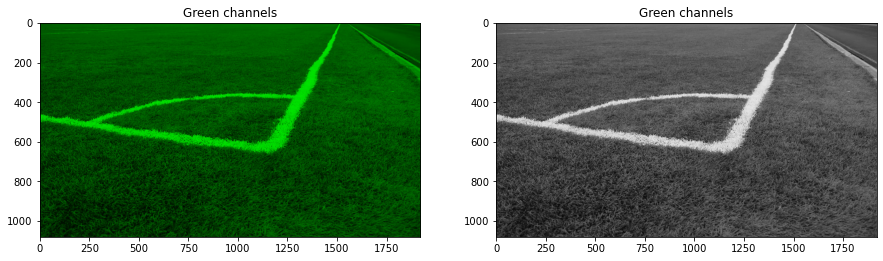

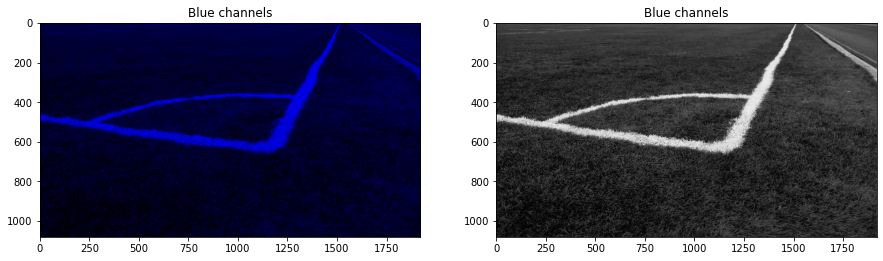

In [28]:
def plot_color_channels(your_image):
    ### we can plot the three different RGB component of the image
    channels_indx = [0,1,2]
    channels_name = ['Red', 'Green', 'Blue']
    ## plot the RGB component
    for i, name in zip(channels_indx, channels_name):
        f = plt.figure(figsize=(15,15))
        to_print = np.zeros_like(your_image, dtype="uint8")
        to_print[:,:,i] = your_image[:,:,i]
        f.add_subplot(1,2, 1)
        plt.imshow(to_print)
        plt.title('{} channels'.format(name))
        f.add_subplot(1,2, 2)
        plt.imshow(your_image[:,:,i], 'gray')
        plt.title('{} channels'.format(name))
        plt.show()
        

img = io.imread('field.png') # load image
print(np.shape(img))
plt.imshow(img)
plt.title('Original RGB image')
plt.show()

#plot the individual color channels
plot_color_channels(img)



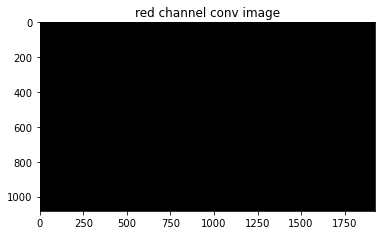

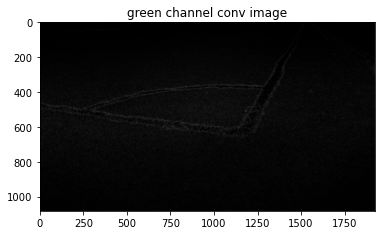

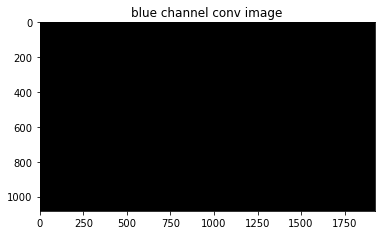

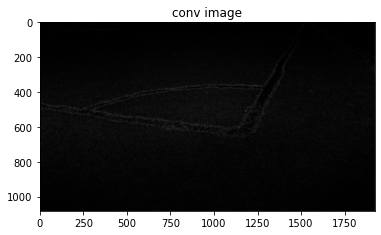

In [34]:
#filter the image
filter = np.array([
    [[0,0,0],[0,0,0],[0,0,0]], 
    [[0,1,0],[1,-4,1],[0,1,0]],
    [[0,0,0],[0,0,0],[0,0,0]]])

# ectract the three channels
r_channel = img_as_float(img[:,:,0])
g_channel = img_as_float(img[:,:,1])
b_channel = img_as_float(img[:,:,2])

r_fil = scipy_conv2d(r_channel,filter[0,:,:]).clip(0,255)
plt.imshow(r_fil,'gray')
plt.title('red channel conv image')
plt.show()
g_fil = scipy_conv2d(g_channel,filter[1,:,:]).clip(0,255)
plt.imshow(g_fil,'gray')
plt.title('green channel conv image')
plt.show()
b_fil = scipy_conv2d(b_channel,filter[2,:,:]).clip(0,255)
plt.imshow(b_fil,'gray')
plt.title('blue channel conv image')
plt.show()
# adding the results of the convolutions
#final = np.sum(np.array([r_fil,g_fil,b_fil]),axis=0).clip(0,255)
final = (r_fil+g_fil+b_fil).clip(0,255)
# Note: normally we would not clip the output of a filter (we would add an offset and/or scale the image back to the range 0-255), but for illustration purposes we choose this way.

plt.imshow(final,'gray')
plt.title('conv image')
plt.show()